In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

DATA PRE PROCESSING

In [22]:
file_id = '1WveLkpd2MTewet7QaaicHXA4hR_1aHsd'
link = f'https://drive.google.com/uc?id={file_id}'
diab = pd.read_csv(link)

diab.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [23]:
impute = SimpleImputer(missing_values= "No Info", strategy = 'most_frequent')
diab[['smoking_history']] = impute.fit_transform(diab[['smoking_history']])

In [24]:
diab.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<ipython-input-25-251ec9f0f586>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(diab.corr(),annot = True, cmap='mako')
<ipython-input-25-251ec9f0f586>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = diab.corr()


                          age  hypertension  heart_disease       bmi  \
age                  1.000000      0.251171       0.233354  0.337396   
hypertension         0.251171      1.000000       0.121262  0.147666   
heart_disease        0.233354      0.121262       1.000000  0.061198   
bmi                  0.337396      0.147666       0.061198  1.000000   
HbA1c_level          0.101354      0.080939       0.067589  0.082997   
blood_glucose_level  0.110672      0.084429       0.070066  0.091261   
diabetes             0.258008      0.197823       0.171727  0.214357   

                     HbA1c_level  blood_glucose_level  diabetes  
age                     0.101354             0.110672  0.258008  
hypertension            0.080939             0.084429  0.197823  
heart_disease           0.067589             0.070066  0.171727  
bmi                     0.082997             0.091261  0.214357  
HbA1c_level             1.000000             0.166733  0.400660  
blood_glucose_level     0.1

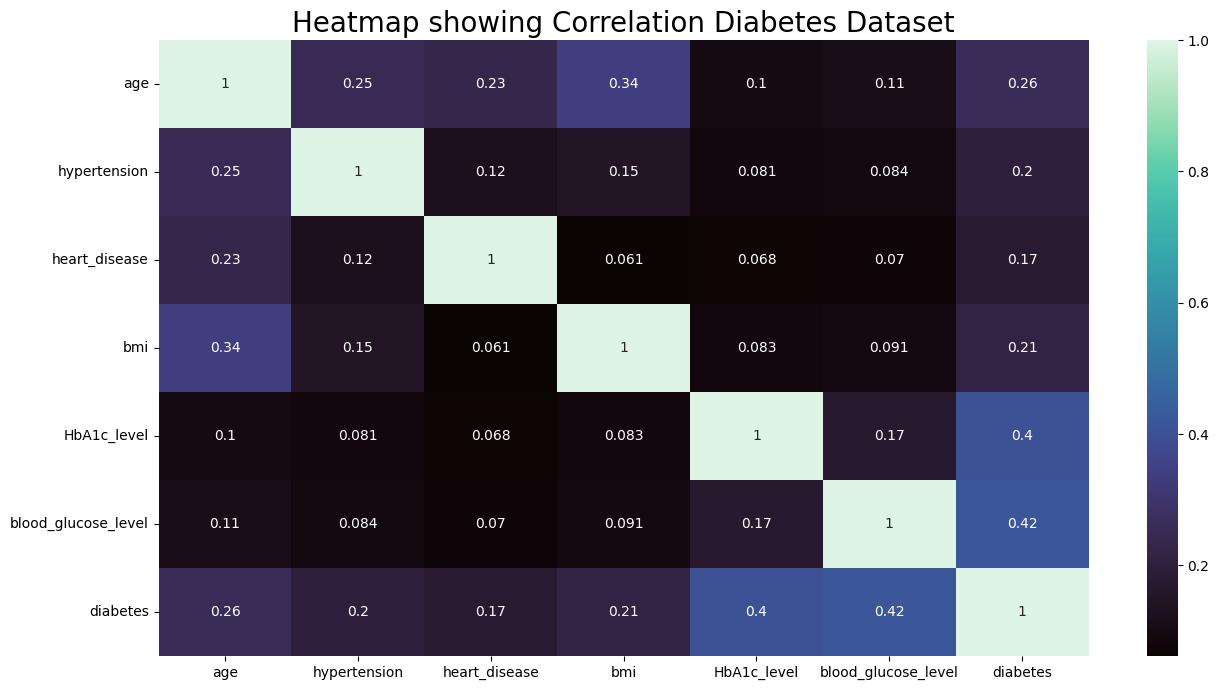

In [25]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation Diabetes Dataset", fontsize=20)
sns.heatmap(diab.corr(),annot = True, cmap='mako')
corr = diab.corr()
print(corr)

In [26]:
diab = diab.drop('gender', axis =1)
diab = diab.drop('smoking_history', axis =1)
x = diab.drop('diabetes', axis =1)

y = diab['diabetes']

print("The independent variable X are",x)

print("The independent variable X are",y)

The independent variable X are         age  hypertension  heart_disease    bmi  HbA1c_level  \
0      80.0             0              1  25.19          6.6   
1      54.0             0              0  27.32          6.6   
2      28.0             0              0  27.32          5.7   
3      36.0             0              0  23.45          5.0   
4      76.0             1              1  20.14          4.8   
...     ...           ...            ...    ...          ...   
99995  80.0             0              0  27.32          6.2   
99996   2.0             0              0  17.37          6.5   
99997  66.0             0              0  27.83          5.7   
99998  24.0             0              0  35.42          4.0   
99999  57.0             0              0  22.43          6.6   

       blood_glucose_level  
0                      140  
1                       80  
2                      158  
3                      155  
4                      155  
...                    ...

In [27]:
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90
99996,Female,2.0,0,0,No Info,17.37,6.5,100
99997,Male,66.0,0,0,former,27.83,5.7,155
99998,Female,24.0,0,0,never,35.42,4.0,100


In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC()
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.948


In [30]:
predicted = svc.predict(x_test)

In [31]:
print('Accuracy =', svc.score(x_test,y_test)*100)

Accuracy = 94.84666666666666


In [32]:
dataf = {'Predicted': y_pred, 'Actual': y_test}
pd.DataFrame(dataf)

,Predicted,Actual
3582,0,0
60498,0,0
53227,0,0
21333,0,0
3885,0,0
...,...,...
86308,0,0
48870,0,1
34940,0,0
21964,0,0


In [33]:
import pickle
pickle.dump(svc, open('model_prac.pkl', 'wb'))

In [35]:
model = pickle.load(open('model_prac.pkl','rb'))

Model Saving